# Efficient-CapsNet Model Train

In this notebook a simple overview is provided to train the models. To change between the routings, change the model_name variable below beteen dynamic_routing or self_attention.


**NB**: remember to modify the "config.json" file with the appropriate parameters.

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages, plotHistory
from models import EfficientCapsNet

In [2]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())
print(tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus, tf.version)
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] <module 'tensorflow._api.v2.version' from 'C:\\Users\\20203080\\AppData\\Roaming\\Python\\Python38\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [3]:
# some parameters
model_name = "dynamic_routing"

# 1.0 Import the Dataset

In [4]:
dataset = Dataset(model_name, config_path='config.json')

## 1.1 Visualize imported dataset

In [6]:
n_images = 20 # number of images to be plotted
#plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [7]:
model_train = EfficientCapsNet(model_name, mode='train', verbose=True)

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 45, 45, 32)        4736      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 45, 45, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 45, 45, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 43, 43, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 43, 43, 64)        0         
                                                 

# 3.0 Train the Model

In [8]:
history = model_train.train(dataset, initial_epoch=0)

Found 144000 files belonging to 2 classes.
Found 16000 files belonging to 2 classes.
------------------------------dynamic_routing train------------------------------
Epoch 1/10
4500/4500 [==============================] - ETA: 0s - loss: 0.6743 - Efficient_CapsNet_loss: 0.1485 - Generator_loss: 1.3414 - Efficient_CapsNet_accuracy: 0.7724
Epoch 1: val_Efficient_CapsNet_accuracy improved from -inf to 0.49994, saving model to bin\efficient_capsnetdynamic_routing_new_train.h5
4500/4500 [==============================] - 345s 74ms/step - loss: 0.6743 - Efficient_CapsNet_loss: 0.1485 - Generator_loss: 1.3414 - Efficient_CapsNet_accuracy: 0.7724 - val_loss: 0.3924 - val_Efficient_CapsNet_loss: 0.3501 - val_Generator_loss: 0.1077 - val_Efficient_CapsNet_accuracy: 0.4999 - lr: 5.0000e-05
Epoch 2/10
4500/4500 [==============================] - ETA: 0s - loss: 0.4245 - Efficient_CapsNet_loss: 0.1305 - Generator_loss: 0.7500 - Efficient_CapsNet_accuracy: 0.7944
Epoch 2: val_Efficient_CapsNet_accu

In [5]:
# Continue training

model_train = EfficientCapsNet(model_name, mode='train', verbose=True)
model_train.model_path = './bin/efficient_capsnetdynamic_routing_new_train.h5'
model_train.load_graph_weights()
history = model_train.train(dataset, initial_epoch=10)


Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 45, 45, 32)        4736      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 45, 45, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 45, 45, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 43, 43, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 43, 43, 64)        0         
                                                 

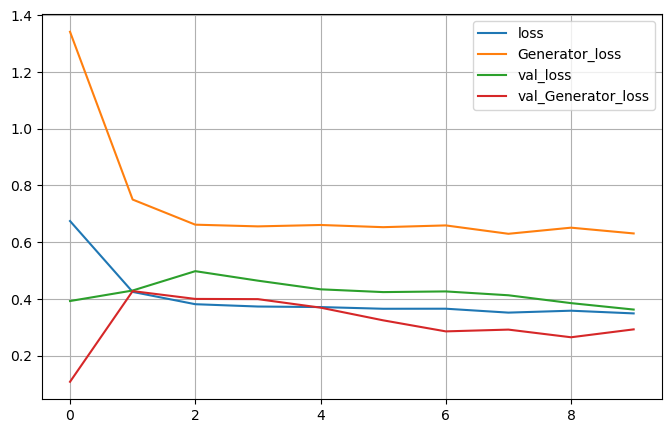

In [10]:
plotHistory(history)